In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


## v_0

In [3]:
# Génération d’un dataset de classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [4]:
# Séparation en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Entraînement d’un modèle de classification (RandomForest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [6]:
# Prédictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 1

In [7]:
# Calcul des métriques
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("ROC-AUC :", roc_auc_score(y_test, y_prob))

Accuracy : 0.88
Precision : 0.9142857142857143
Recall : 0.8648648648648649
F1-Score : 0.8888888888888888
ROC-AUC : 0.9519688227553396


In [8]:
# Matrice de confusion
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))


Matrice de confusion :
[[80  9]
 [15 96]]


In [9]:
# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))



Rapport de classification :
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        89
           1       0.91      0.86      0.89       111

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



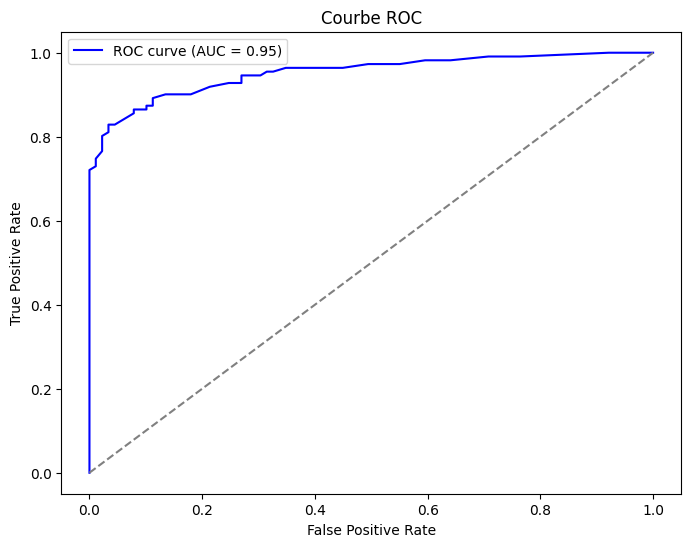

In [18]:
# Calcul de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Tracé de la courbe ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label="ROC curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Ligne aléatoire
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC")
plt.legend()
plt.show()


## v_1

In [2]:
# 1. Générer des données simples 2D
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

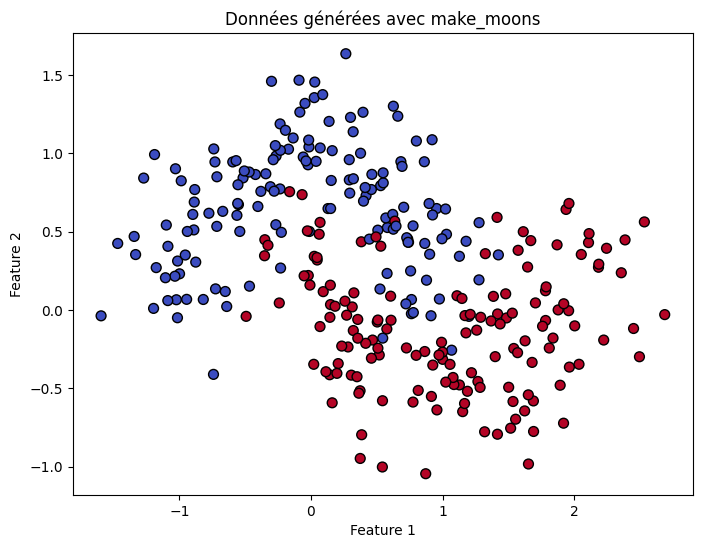

In [11]:
# visualiser les données
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
plt.title('Données générées avec make_moons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [3]:
# 2. Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# 3. Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 4. Créer et entraîner le modèle
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [6]:
# 5. Prédiction et évaluation
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

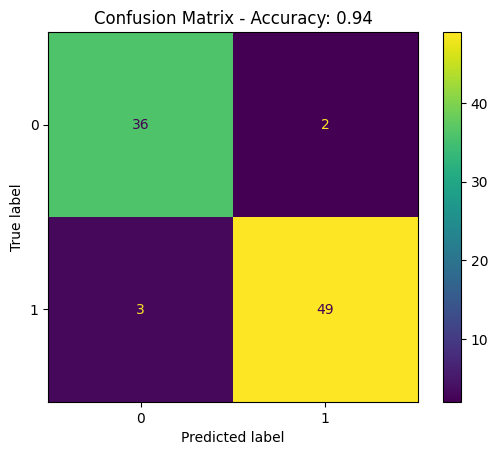

In [7]:
# 6. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Confusion Matrix - Accuracy: {acc:.2f}")
plt.show()

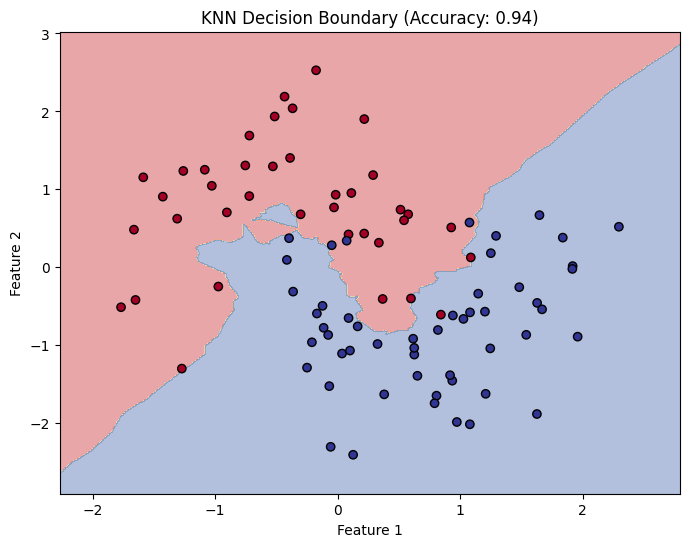

In [10]:

# 7. Visualisation de la frontière de décision
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    h = 0.01
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


# 8. Afficher la frontière
plot_decision_boundary(model, X_test_scaled, y_test, title=f"KNN Decision Boundary (Accuracy: {acc:.2f})")


## v_2

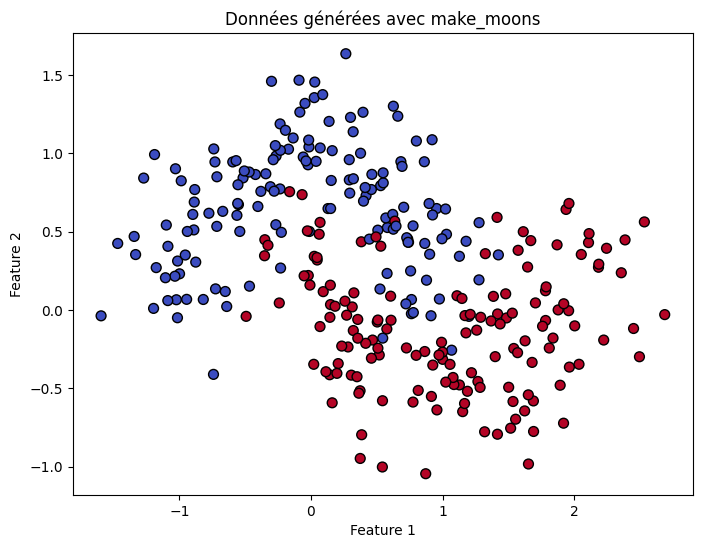

In [30]:
# 1. Génération d’un jeu de données 2D simple
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# visualiser les données
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
plt.title('Données générées avec make_moons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [31]:
# 2. Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# 3. Standardisation (pas toujours nécessaire pour LightGBM, mais bonne pratique)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# donnons un nom aux colonnes pour la clarté
X_tX_train_scaledrain = pd.DataFrame(X_train_scaled, columns=['feat1', 'feat2'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['feat1', 'feat2'])


In [33]:
# 4. Modèle LightGBM
model = LGBMClassifier()
model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 98, number of negative: 112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 210, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466667 -> initscore=-0.133531
[LightGBM] [Info] Start training from score -0.133531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier()

In [34]:
# 5. Prédictions
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

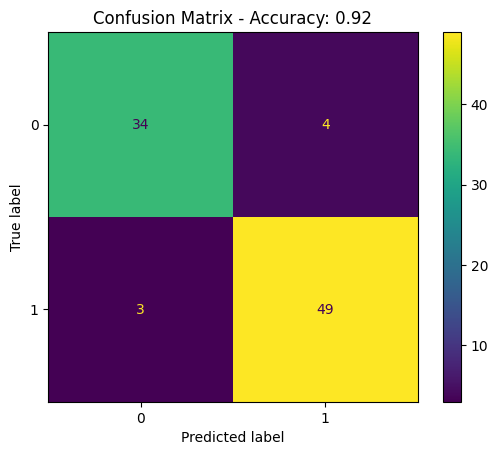

In [35]:
# 6. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title(f"Confusion Matrix - Accuracy: {acc:.2f}")
plt.show()

In [36]:
# 7. Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        38
           1       0.92      0.94      0.93        52

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90



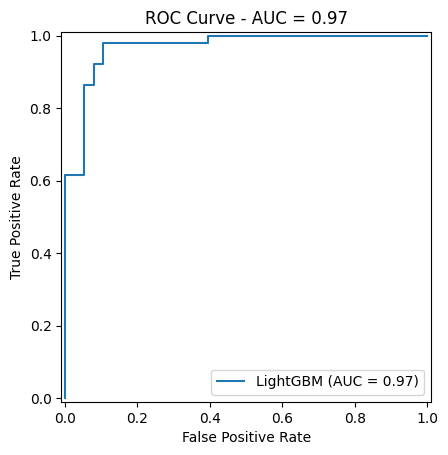

In [37]:
# 7. Courbe ROC
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe 1
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Affichage
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="LightGBM").plot()
plt.title(f"ROC Curve - AUC = {roc_auc:.2f}")
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/alyra-ml-1-py3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


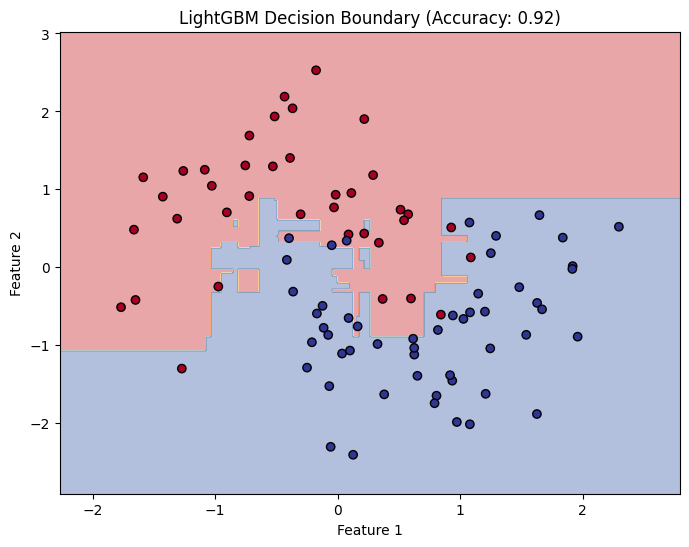

In [44]:
# 8. Visualisation de la frontière de décision
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    h = 0.01
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(model, X_test_scaled.to_numpy(), y_test, title=f"LightGBM Decision Boundary (Accuracy: {acc:.2f})")
